<a href="https://colab.research.google.com/github/lkmsdf159/Colleage-/blob/main/4%EC%A3%BC%EC%B0%A8_roc_auc%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%8B%A4%EC%8A%B5_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Evaluation Matrix in ML
# Comfusion Matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Generating actual classes of a given number of instances
# Using Bionomial distribution, where the parameters are
# bionomial (n, p ,size)

actual_output = np.random.binomial(1, .9, size = 1000)
print(actual_output)
actual_output = pd.DataFrame(actual_output)
actual_output.sample(100)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 

,0
882,1
865,1
398,1
554,1
754,1
...,...
41,1
909,1
83,1
647,1


In [ ]:
# predicted classes of a given number of instances
predicted_output = np.random.binomial(1, 0.9, size = 1000)
print(predicted_output)
predicted_output = pd.DataFrame(predicted_output)
predicted_output.sample(100)

[1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 

,0
268,1
94,1
754,1
734,1
725,1
...,...
643,1
483,1
697,1
997,1


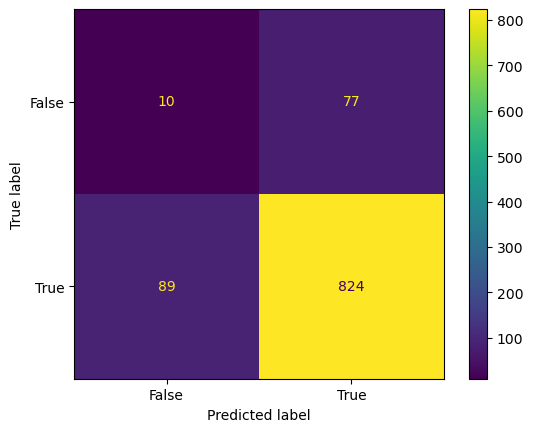

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual_output, predicted_output)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =
                                            confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# Evaluation Matrics(Accuracy, Precision, Recall, Specificity, and F1-Score)
# Import Required Libraries Invlove the Evaluation Matrics
# Accuracy result:
Accuracy = metrics.accuracy_score(actual_output, predicted_output)
print("The accuracy value is:", Accuracy)

# Precision result:
Precision = metrics.precision_score(actual_output, predicted_output)
print("The precision value is:", Precision)

# Recall (Sensitivity) result:
Recall = metrics.recall_score(actual_output, predicted_output)
print("THe recall value is:", Recall)

# True Negative Rate (Specificity) result:
# Since it is just the opposite of Recall, we use the recall_score function,
# taking the opposite position label;
Specificity = metrics.recall_score(actual_output, predicted_output, pos_label = 0)
print("The specificity value is:", Specificity)

# F1-Score
F1_Score = metrics.f1_score(actual_output, predicted_output)
print("The f1-score value is:", F1_Score)

The accuracy value is: 0.834
The precision value is: 0.9145394006659268
THe recall value is: 0.9025191675794085
The specificity value is: 0.11494252873563218
The f1-score value is: 0.908489525909592


In [ ]:
# We can also utilize the classification report function to get the
# results of the metrics(Accuracy, precision, recall, and F1-score)
mat = metrics.classification_report(actual_output, predicted_output)
print(mat)

              precision    recall  f1-score   support

           0       0.10      0.11      0.11        87
           1       0.91      0.90      0.91       913

    accuracy                           0.83      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.84      0.83      0.84      1000



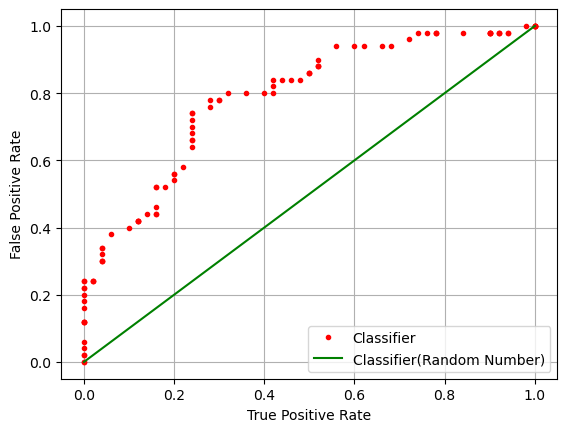

THe area under ROC curve (AUC-ROC) is:  0.792


In [ ]:
# ROC Cureve:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('auc-case-predictions.csv')

threshold = 0.5
tp = 0; tn = 0; fp = 0; fn=0;
for index, instance in df.iterrows():
    actual = instance["actual"]
# print (actual)
    prediction = instance["prediction"]
# print(prediction)
    if prediction >= threshold:
        prediction_class = 1
    else:
        prediction_class = 0

    # Calculating the confusion matrix terms:
    if prediction_class == 1 and actual ==1:
        tp = tp + 1
    elif actual == 1 and prediction_class == 0:
        fn = fn + 1
    elif actual == 0 and prediction_class == 1:
        fp = fp + 1
    elif actual == 0 and prediction_class == 0:
        tn = tn + 1

# Calculating true positive rate and false positive rate:
tpr = tp/(tp+fn)

fpr = fp/(fp+tn)


# Tuning the threshold:
roc_score = []
# thresholds = List(np.array(List(range(0, 1000+1, 1 )))/1000)
arr = np.arange(0,1,0.01)
thresholds = arr.tolist()

for threshold in thresholds:
    tp = 0; tn = 0; fp=0; fn=0;
    for index, instance in df.iterrows():
        actual = instance["actual"]

        prediction = instance["prediction"]

        if prediction >+ threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        # calculating the confusion matrix terms:
        if prediction_class == 1 and actual ==1:
            tp = tp+1
        elif actual == 1 and prediction_class ==0:
            fn= fn+1
        elif actual ==0 and prediction_class == 1:
            fp = fp+1
        elif actual == 0 and prediction_class == 0:
            tn = tn+1

    tpr = tp/(tp+fn)

    fpr = fp/(fp+tn)

    roc_score.append([tpr, fpr])

# Convert roc scores into pandas dataframe:
roc_points = pd.DataFrame(roc_score, columns = ['tpr', 'fpr'])
roc_points['threshold']= thresholds

# Plot ROC Curve
plt.plot(roc_points.fpr, roc_points.tpr, 'r.')
# plt.legend(["Classifier Model"])
# plot predictions based on random numbers
plt.plot([0,1], 'g')
plt.legend(['Classifier', 'Classifier(Random Number)'], loc = 4)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.grid()
plt.show()

#(AUC-ROC)
from numpy import trapz
auc= round(abs(np.trapz(roc_points.tpr, roc_points.fpr)), 4)
print("THe area under ROC curve (AUC-ROC) is: ", auc)